<a href="https://colab.research.google.com/github/RadianceRedefined/employee-turnover-analytics/blob/main/Employee_Turnover_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("HR_comma_sep.csv")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


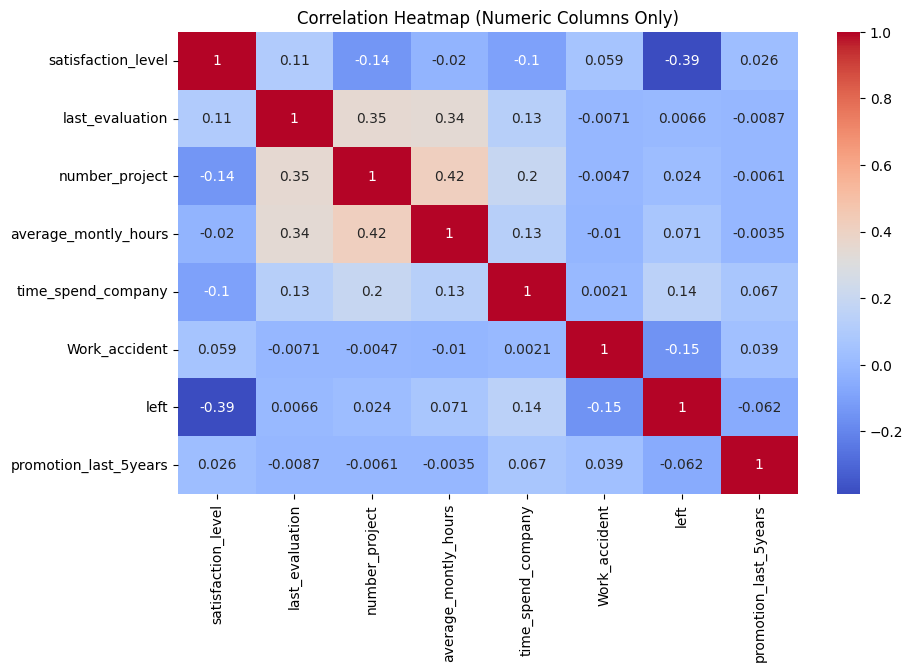

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


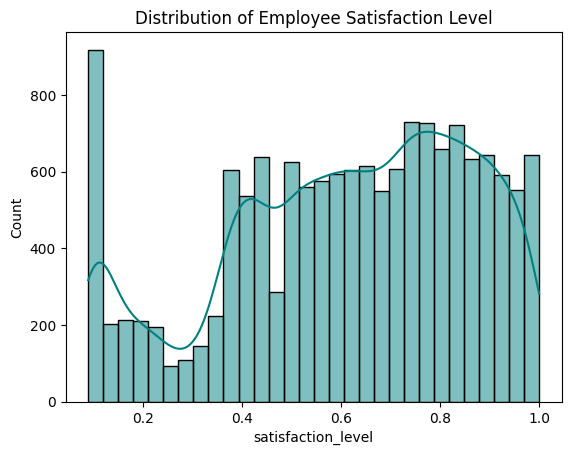

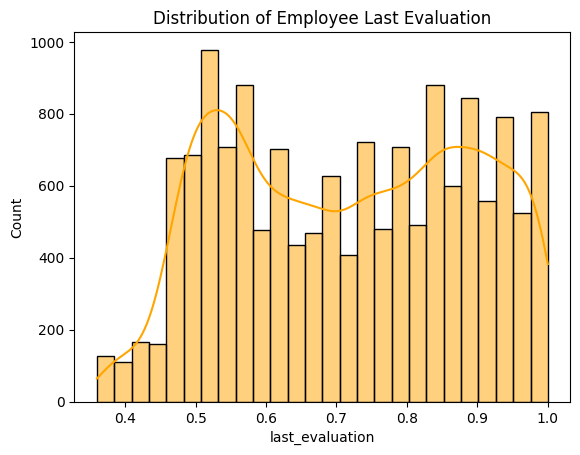

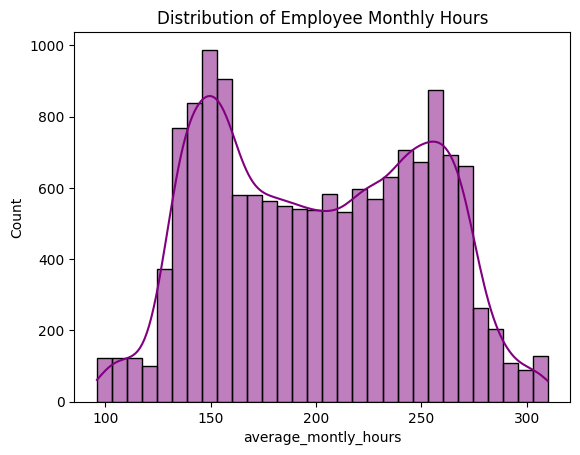

In [7]:
# Satisfaction Level Distribution
sns.histplot(df['satisfaction_level'], kde=True, color='teal')
plt.title("Distribution of Employee Satisfaction Level")
plt.show()

# Last Evaluation Distribution
sns.histplot(df['last_evaluation'], kde=True, color='orange')
plt.title("Distribution of Employee Last Evaluation")
plt.show()

# Average Monthly Hours Distribution
sns.histplot(df['average_montly_hours'], kde=True, color='purple')
plt.title("Distribution of Employee Monthly Hours")
plt.show()


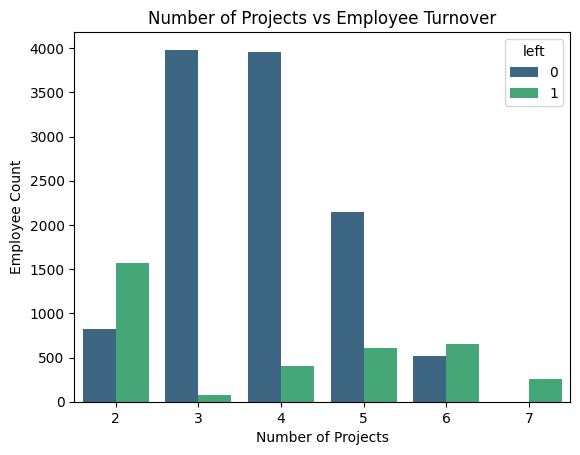

In [8]:
sns.countplot(data=df, x='number_project', hue='left', palette='viridis')
plt.title("Number of Projects vs Employee Turnover")
plt.xlabel("Number of Projects")
plt.ylabel("Employee Count")
plt.show()


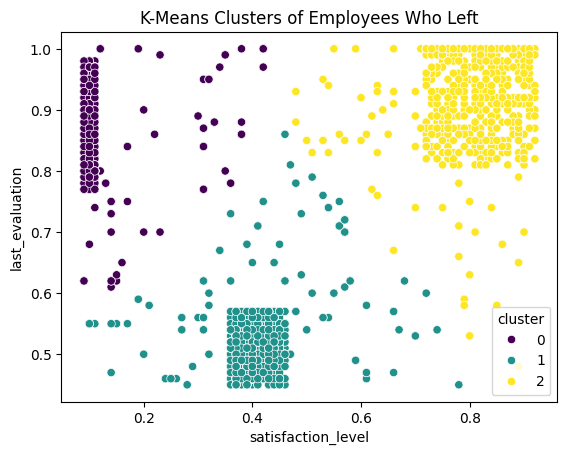

In [9]:
from sklearn.cluster import KMeans

# Filter employees who left
left_df = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

# Apply K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=123)
left_df['cluster'] = kmeans.fit_predict(left_df[['satisfaction_level', 'last_evaluation']])

# Visualize clusters
sns.scatterplot(data=left_df, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='viridis')
plt.title("K-Means Clusters of Employees Who Left")
plt.show()



In [10]:
# Rename 'sales' to 'department' for clarity
df.rename(columns={'sales': 'department'}, inplace=True)

# Convert categorical variables into numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Check updated columns
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('left', axis=1)
y = df['left']

# Split the data (80 % train, 20 % test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=123)

print("Before SMOTE:")
print(y_train.value_counts(normalize=True))

# Apply SMOTE
smote = SMOTE(random_state=123)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train_res.value_counts(normalize=True))


Before SMOTE:
left
0    0.761897
1    0.238103
Name: proportion, dtype: float64

After SMOTE:
left
0    0.5
1    0.5
Name: proportion, dtype: float64


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123)
}

# Cross-validation accuracy comparison
for name, model in models.items():
    scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
    print(f"{name} - Mean CV Accuracy: {scores.mean():.4f}")


Logistic Regression - Mean CV Accuracy: 0.7950
Random Forest - Mean CV Accuracy: 0.9837
Gradient Boosting - Mean CV Accuracy: 0.9630



Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000

ROC AUC: 0.8153723431629869


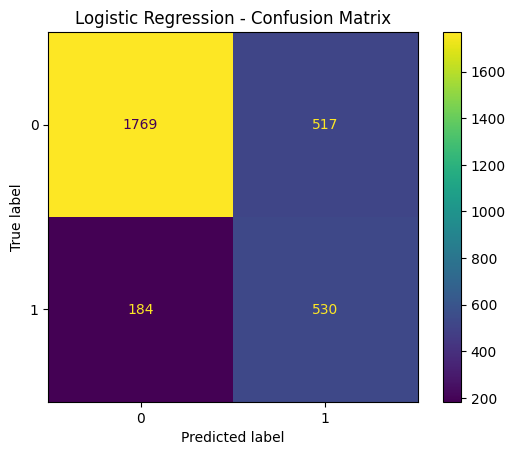


Random Forest
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

ROC AUC: 0.9944807756873528


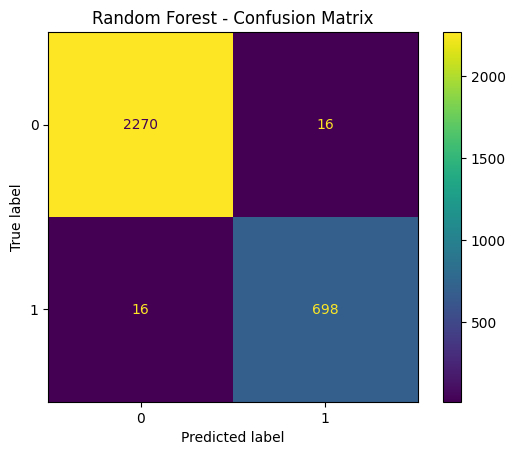


Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.93      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000

ROC AUC: 0.9856059659209264


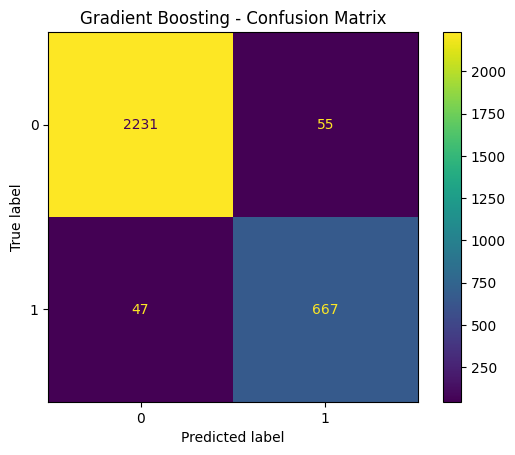

In [13]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))

    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [15]:
# Train the best model on full balanced training data
best_model = RandomForestClassifier(random_state=123)
best_model.fit(X_train_res, y_train_res)

# Predict probabilities on the test set
probs = best_model.predict_proba(X_test)[:, 1]

# Categorize employees into risk zones
def categorize(score):
    if score < 0.2:
        return "Safe Zone (Green)"
    elif score < 0.6:
        return "Low-Risk Zone (Yellow)"
    elif score < 0.9:
        return "Medium-Risk Zone (Orange)"
    else:
        return "High-Risk Zone (Red)"

# Create a results DataFrame
results = X_test.copy()
results['turnover_probability'] = probs
results['risk_zone'] = results['turnover_probability'].apply(categorize)

results.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,turnover_probability,risk_zone
10627,0.98,0.77,3,191,2,0,0,False,False,False,False,False,False,True,False,False,False,True,0.00,Safe Zone (Green)
2703,0.76,0.93,3,271,5,0,0,False,False,True,False,False,False,False,False,False,True,False,0.59,Low-Risk Zone (Yellow)
6059,0.70,0.93,3,185,4,0,0,False,True,False,False,False,False,False,False,False,False,True,0.06,Safe Zone (Green)
3258,0.48,0.61,3,223,3,1,0,False,False,False,False,False,False,False,True,False,False,True,0.01,Safe Zone (Green)
4565,0.57,0.90,3,144,2,0,0,False,False,False,False,False,False,False,False,False,False,True,0.01,Safe Zone (Green)
4991,0.79,0.82,3,98,3,1,0,False,False,True,False,False,False,False,False,False,True,False,0.00,Safe Zone (Green)
13976,0.92,0.64,4,190,10,1,0,False,False,False,True,False,False,False,False,False,True,False,0.00,Safe Zone (Green)
9427,0.98,0.54,4,178,3,0,0,False,False,False,False,False,False,False,False,True,True,False,0.00,Safe Zone (Green)
7173,1.00,0.61,5,264,3,0,0,True,False,False,False,False,False,False,False,False,False,True,0.00,Safe Zone (Green)
13412,0.53,0.64,3,143,2,0,0,False,False,False,False,False,False,True,False,False,True,False,0.01,Safe Zone (Green)
